In [ ]:
#INSTALLING PYCARET LIBRARY
!pip install pycaret

# Introduction
### Thyroid disease (TD) is one of the most progressive endocrine disorders in the human population today. Prediction of the endocrine disease is a critical task in the field of clinical data analysis. Machine Learning (ML) has shown effective results in the decision making and predictions from the enormous data generated by healthcare domain. Various studies in the prediction of thyroid disease have given only a glimpse using machine learning algorithms. In this project we have proposed three models based on the primary dataset collected from 3772  patients.

<img src="https://i.imgur.com/5cW3lGZ.gif?noredirect" width="800px">

In [ ]:
import pandas as pd #IMPORTING PANDAS LIBRARY
thyroid=pd.read_csv("hypothyroid.csv")
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
thyroid.columns #LIST OF COLUMNS IN THYROID DATASET

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
import numpy as np #IMPORT NUMPY LIBRARY
thyroid=thyroid.replace({"?":np.NAN}) #REPLACING ? WITH NP.NAN

In [ ]:
thyroid["binaryClass"]=thyroid["binaryClass"].map({"P":1,"N":0})  #REPLACING P WITH 1 AND N WITH 0
thyroid=thyroid.replace({"t":1,"f":0})  #REPLACING t WITH 1 AND f WITH 0
thyroid=thyroid.replace({"F":1,"M":0})  #REPLACING F WITH 1 AND M WITH 0
cols = thyroid.columns[thyroid.dtypes.eq('object')]
thyroid[cols] = thyroid[cols].apply(pd.to_numeric, errors='coerce') #CONVERTING DATA TO NUMERIC VALUE
thyroid.dtypes  #CHECKING THE DATA TYPES

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
T

In [ ]:
thyroid.info()  #CHECKING INFO ABOUT THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
thyroid['T4U measured'].fillna(thyroid['T4U measured'].mean(), inplace=True) #FILLING THE NA ENTRIES WITH THE MEAN VALUE
thyroid['sex'].fillna(thyroid['sex'].mean(), inplace=True)  #FILLING THE NA ENTRIES WITH THE MEAN VALUE
thyroid['age'].fillna(thyroid['age'].mean(), inplace=True)  #FILLING THE NA ENTRIES WITH THE MEAN VALUE
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
thyroid['TSH'] = imputer.fit_transform(thyroid[['TSH']])  #TRANSFORMING THE ENTRIES WITH SIMPLE IMPUTER
thyroid['T3'] = imputer.fit_transform(thyroid[['T3']])  #TRANSFORMING THE ENTRIES WITH SIMPLE IMPUTER
thyroid['TT4'] = imputer.fit_transform(thyroid[['TT4']])  #TRANSFORMING THE ENTRIES WITH SIMPLE IMPUTER
thyroid['T4U'] = imputer.fit_transform(thyroid[['T4U']])  #TRANSFORMING THE ENTRIES WITH SIMPLE IMPUTER
thyroid['FTI'] = imputer.fit_transform(thyroid[['FTI']])  #TRANSFORMING THE ENTRIES WITH SIMPLE IMPUTER

In [ ]:
thyroid.isnull().sum()  #CHECKING THE TOTAL NUMBER OF NULL VALUES

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                             0
T3 measured                     0
T3                              0
TT4 measured                    0
TT4                             0
T4U measured                    0
T4U                             0
FTI measured                    0
FTI                             0
TBG measured                    0
TBG                          3772
referral source              3772
binaryClass   

In [ ]:
del thyroid["TBG"]  #DELETING THE TBG COLUMN
del thyroid["referral source"]  #DELETING THE REFERRAL SOURCE COLUMN

In [ ]:
thyroid.info()  #CHECKING THE INFO ABOUT THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
thyroid.head()  #HAVING A PEEK ON THE DATAFRAME

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,1


In [ ]:
thyroid.columns #LIST OF COLUMNS IN THE DATASET

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [ ]:
#matplotlib
import matplotlib.pyplot as plt #IMPORTING MATPLOTLIB

#seaborn
import seaborn as sns #IMPORTING SEABORN

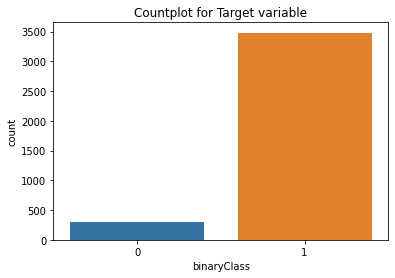

In [ ]:
sns.countplot(x='binaryClass',data=thyroid) #PLOTING THE COUNTPLOT FOR THE TARGET VARIABLE
plt.title("Countplot for Target variable");

1 REPRESENTS POSITIVE, 0 REPRESENTS NEGATIVE

DISTRIBUTION OF THE POSITIVE CLASS BASED ON AGE

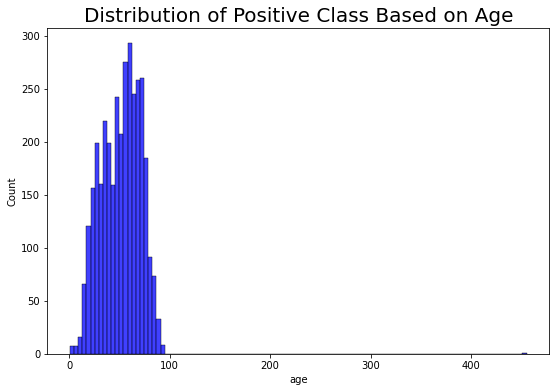

In [ ]:
positive_df = thyroid[thyroid.binaryClass==1]
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

DISTRIBUTION ON THE BASIS OF SICK AND WELL

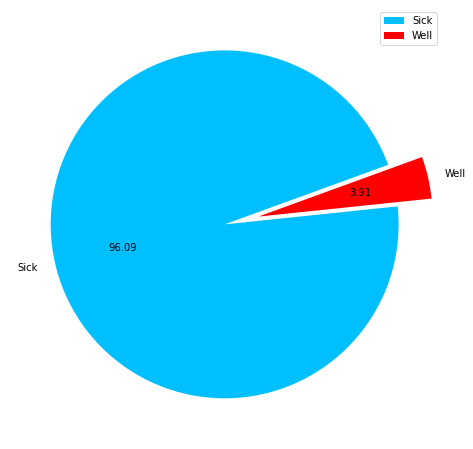

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [ ]:
#SETTING THE FIGURE SIZE
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


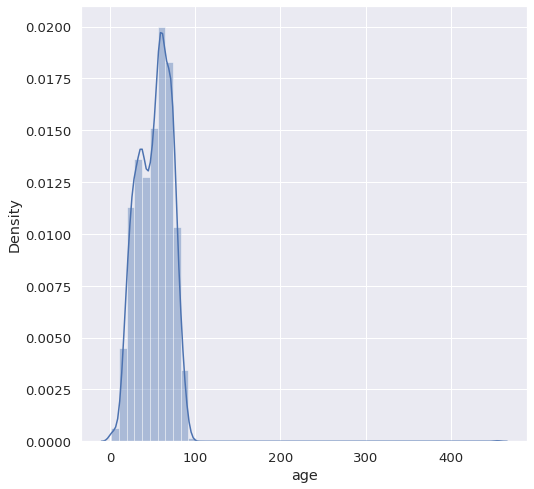

In [ ]:
#PLOTTING THE DIST PLOT ON THE AGE COLUMN
sns.distplot(thyroid['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


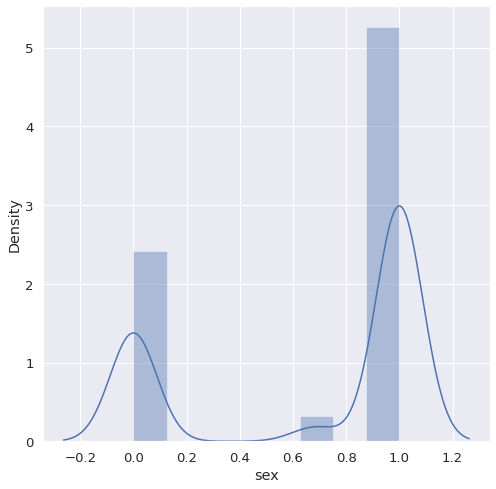

In [ ]:
#PLOTTING THE DIST PLOT ON THE SEX COLUMN
sns.distplot(thyroid['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


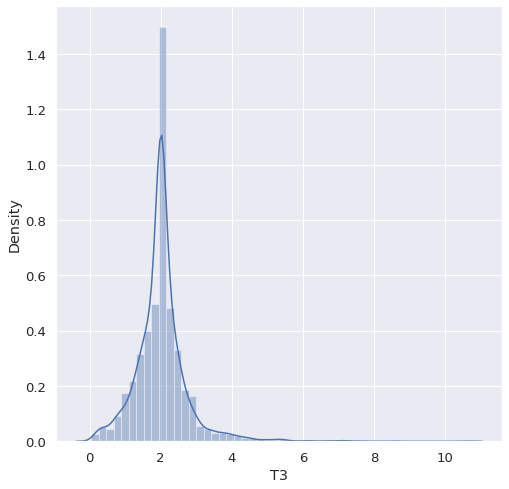

In [ ]:
#PLOTTING THE DIST PLOT ON THE T3 COLUMN
sns.distplot(thyroid['T3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


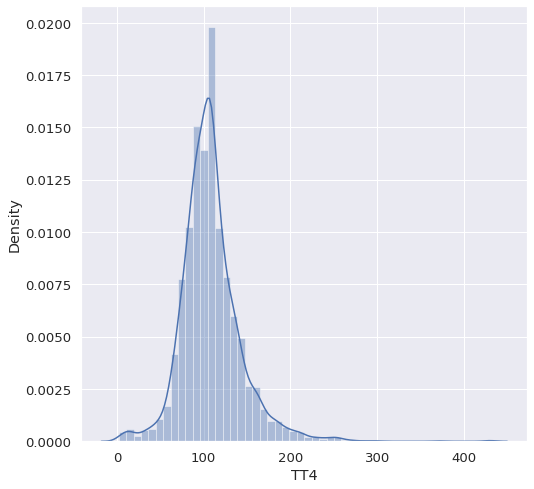

In [ ]:
#PLOTTING THE DIST PLOT ON THE TT4 COLUMN
sns.distplot(thyroid['TT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


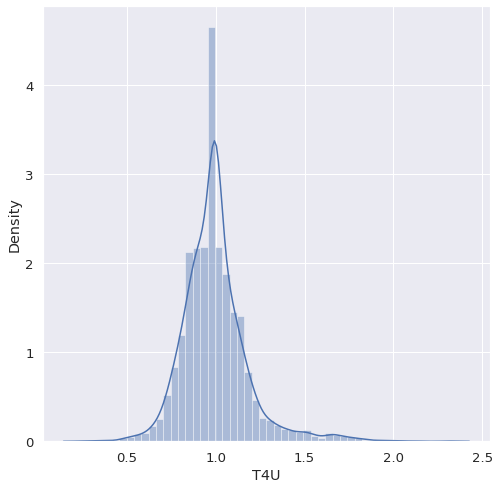

In [ ]:
#PLOTTING THE DIST PLOT ON THE T4U COLUMN
sns.distplot(thyroid['T4U'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


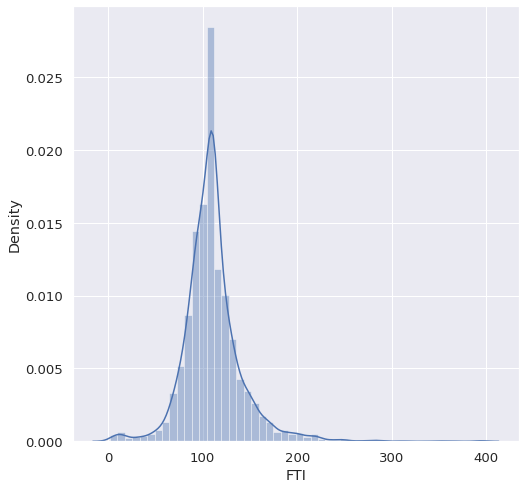

In [ ]:
#PLOTTING THE DIST PLOT ON THE FTI COLUMN
sns.distplot(thyroid['FTI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


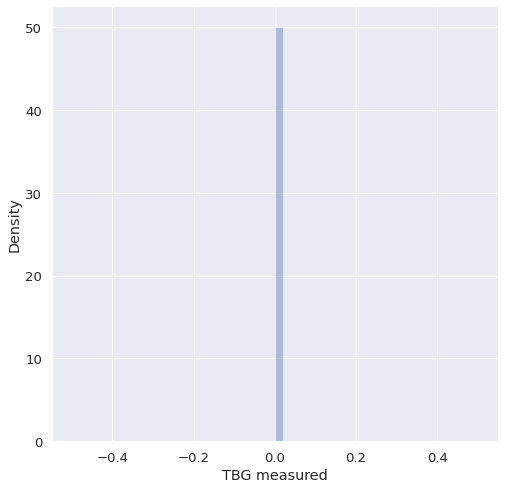

In [ ]:
#PLOTTING THE DIST PLOT ON THE TBG MEASURED COLUMN
sns.distplot(thyroid['TBG measured'])

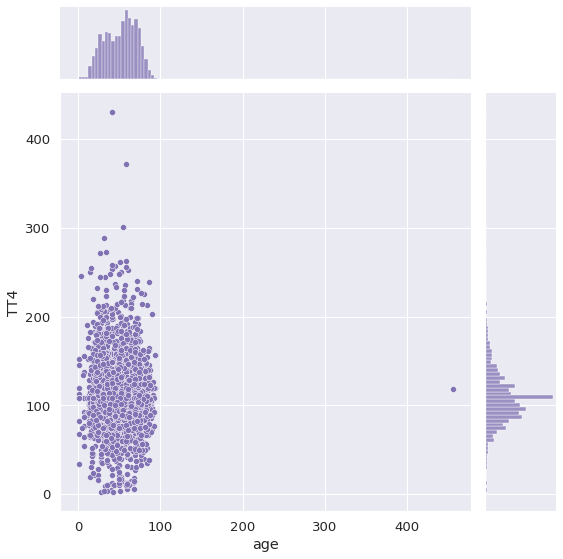

In [ ]:
#PLOTTING THE JOINT PLOT ON THE AGE VS TT4 COLUMN
sns.jointplot(x='age', y='TT4', data=thyroid, kind='scatter', height=8, color='m')

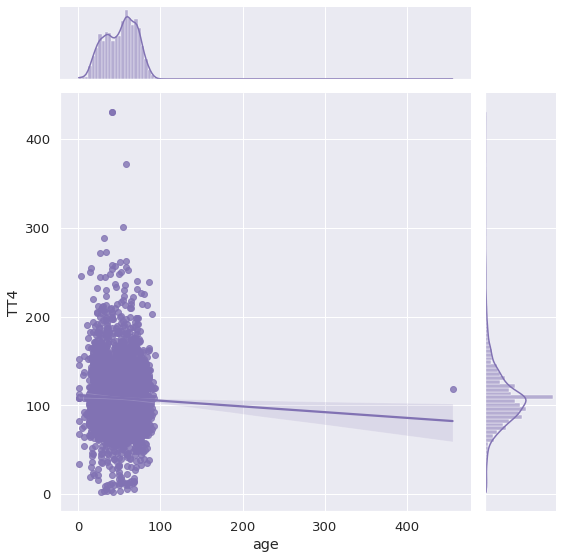

In [ ]:
#PLOTTING THE JOINT PLOT ON THE AGE VS TT4 COLUMN
sns.jointplot(x='age', y='TT4', data=thyroid, kind='reg', height=8, color='m')

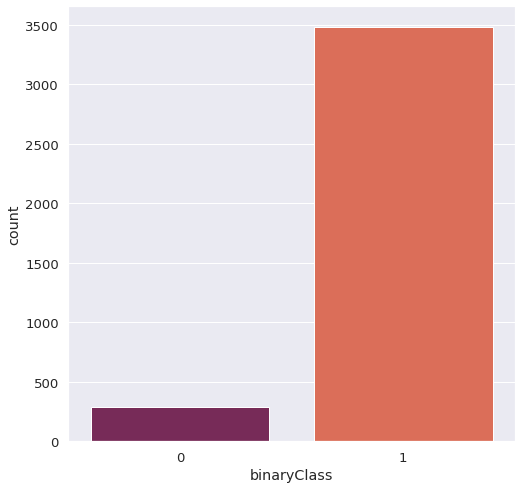

In [ ]:
#PLOTTING THE COUNT PLOT ON THE BINARYCLASS
sns.countplot(x='binaryClass', data=thyroid, palette='rocket')

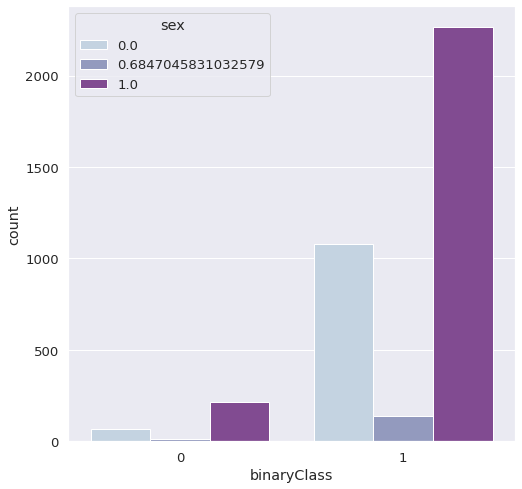

In [ ]:
#PLOTTING THE COUNT PLOT ON THE BINARYCLASS ON THE BASIS OF SEX
sns.countplot(x='binaryClass', data=thyroid, hue='sex', palette='BuPu')

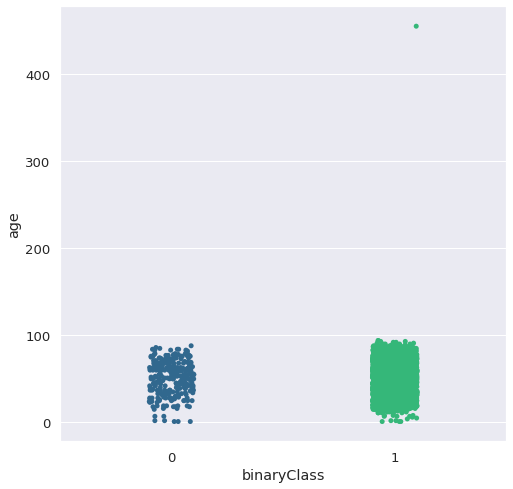

In [ ]:
#PLOTTING THE STRIP PLOT ON THE BINARYCLASS
sns.stripplot(x="binaryClass", y="age", data=thyroid, palette="viridis")

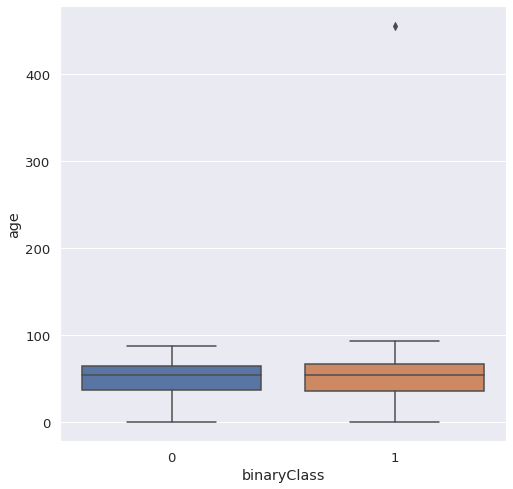

In [ ]:
#PLOTTING THE BOX PLOT ON THE BINARYCLASS
sns.boxplot(x='binaryClass', y='age', data=thyroid)

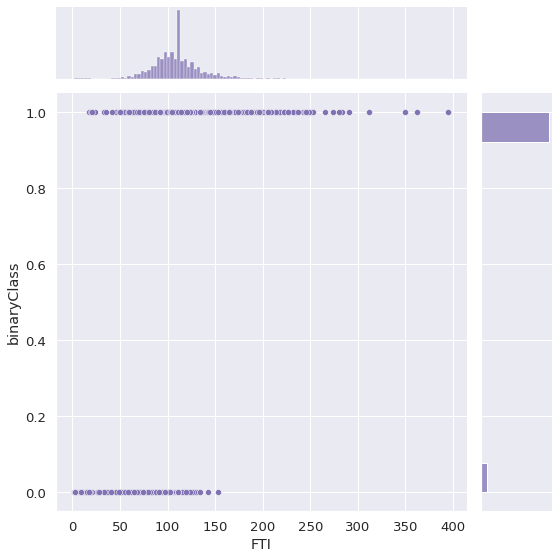

In [ ]:
#PLOTTING THE JOINT PLOT ON FTI VS BINARYCLASS
sns.jointplot(x='FTI', y='binaryClass', data=thyroid, kind='scatter', height=8, color='m')

In [ ]:
#THE THYROID CORRELEATION MATRIX
thyroid_corr = thyroid.corr()
thyroid_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.003606,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,0.003174
sex,0.003606,1.000000,0.098510,-0.043533,0.030484,-0.005755,0.079550,0.036586,0.020372,0.046353,...,-7.500437e-02,6.275929e-02,-7.387180e-02,1.669887e-01,-4.934307e-02,2.255718e-01,-5.016697e-02,3.853089e-02,NaN,-0.050808
on thyroxine,0.014563,0.098510,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,0.081060
query on thyroxine,-0.017870,-0.043533,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,0.007448
on antithyroid medication,-0.063881,0.030484,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,0.021689
sick,0.079468,-0.005755,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,0.001749
pregnant,-0.113521,0.079550,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,0.034516
thyroid surgery,-0.029502,0.036586,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,0.017633
I131 treatment,0.052704,0.020372,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,-0.003590
query hypothyroid,0.039562,0.046353,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,-0.086282


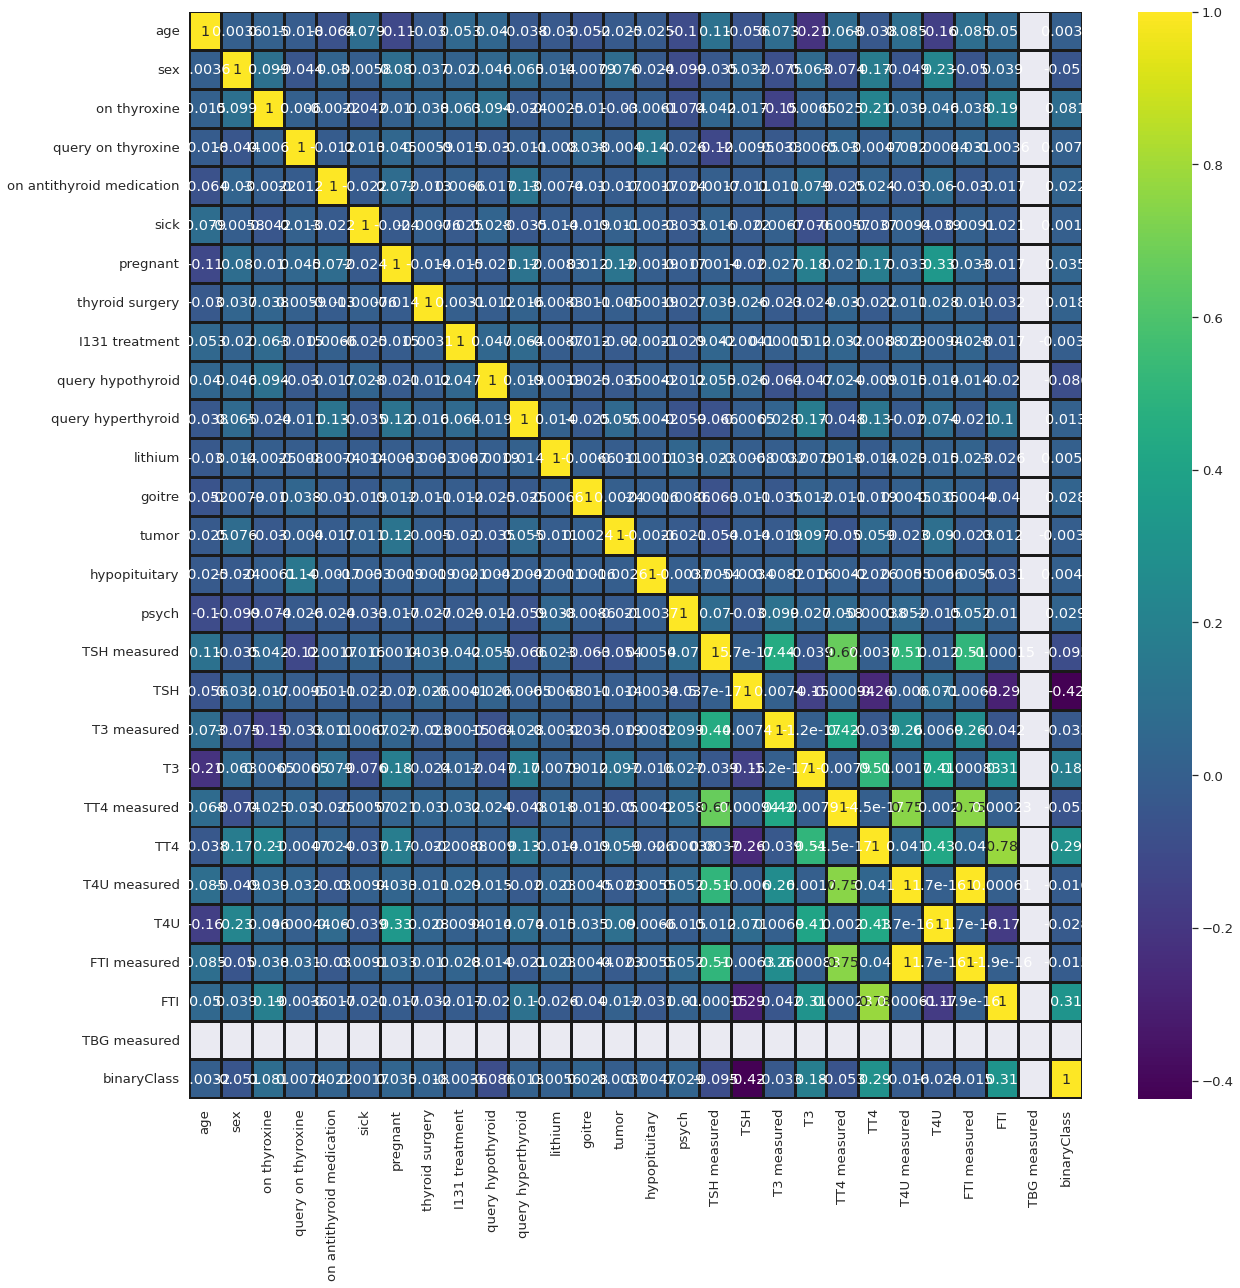

In [ ]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.2) #SETTING THE FIGURE SIZE
sns.heatmap(thyroid_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)  #PLOTTING HEAT MAP FOR THE CO RELATION

In [ ]:
#SETTING UP THE COLUMN FOR THE PYCARET LIBRARY
from pycaret.classification import*
df = setup(data = thyroid,target='binaryClass',numeric_features=['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured'])

,Description,Value
0,session_id,6650
1,Target,binaryClass
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3772, 28)"
5,Missing Values,False
6,Numeric Features,27
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#CHECKING THE DATAFRAME
df

(StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 [],
        age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
 2487  73.0  0.0           0.0                 0.0                        0.0   
 3036  56.0  0.0           0.0                 0.0                        0.0   
 1052  37.0  0.0           0.0                 0.0                        0.0   
 1254  39.0  1.0           0.0                 0.0                        0.0   
 1740  63.0  1.0           0.0                 0.0                        0.0   
 ...    ...  ...           ...                 ...                        ...   
 757   70.0  1.0           0.0                 0.0                        0.0   
 175   42.0  1.0           0.0                 0.0                        0.0   
 1251  28.0  1.0           0.0                 1.0                        0.0   
 813   54.0  0.0           0.0                 0.0                        0.0   
 2457  61.0  1.0           0.0         

In [ ]:
#COMPARING BETWEEN DIFFERENT MODELS AND CHOOSING THE BEST FIT
compare_models(fold=7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9955,0.9988,0.9967,0.9984,0.9975,0.9672,0.9674,0.3186
ada,Ada Boost Classifier,0.9947,0.9881,0.9971,0.9971,0.9971,0.9615,0.9620,0.1771
lightgbm,Light Gradient Boosting Machine,0.9947,0.9988,0.9963,0.9980,0.9971,0.9618,0.9620,0.1314
dt,Decision Tree Classifier,0.9939,0.9850,0.9955,0.9980,0.9967,0.9565,0.9568,0.0543
rf,Random Forest Classifier,0.9939,0.9992,0.9943,0.9992,0.9967,0.9573,0.9581,0.6157
et,Extra Trees Classifier,0.9784,0.9963,0.9967,0.9803,0.9884,0.8235,0.8323,0.5629
lr,Logistic Regression,0.9602,0.9822,0.9959,0.9626,0.9789,0.6275,0.6657,1.5657
knn,K Neighbors Classifier,0.9561,0.8590,0.9939,0.9601,0.9767,0.5953,0.6283,0.2014
svm,SVM - Linear Kernel,0.9545,0.0000,0.9894,0.9628,0.9758,0.5957,0.6258,0.0500
lda,Linear Discriminant Analysis,0.9439,0.9211,0.9975,0.9450,0.9705,0.3963,0.4796,0.0271


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6650, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#CREATING THE GRADIENT BOOSTER CLASSIFIER MODEL
gbcmodel=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9924,1.0000,0.9918,1.0000,0.9959,0.9459,0.9473
1,0.9962,0.9991,1.0000,0.9959,0.9980,0.9709,0.9713
2,0.9962,0.9991,1.0000,0.9959,0.9980,0.9709,0.9713
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9924,0.9982,0.9918,1.0000,0.9959,0.9483,0.9495
5,0.9962,1.0000,0.9959,1.0000,0.9979,0.9736,0.9739
6,0.9886,0.9992,0.9918,0.9959,0.9938,0.9207,0.9210
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9962,0.9961,0.9959,1.0000,0.9979,0.9736,0.9739


In [ ]:
#TUNING THE GBC MODEL
tuned_gbc_model=tune_model(gbcmodel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9962,1.0000,0.9959,1.0000,0.9980,0.9723,0.9727
1,0.9962,0.9991,1.0000,0.9959,0.9980,0.9709,0.9713
2,0.9924,0.9987,1.0000,0.9919,0.9959,0.9404,0.9421
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9924,0.9967,0.9918,1.0000,0.9959,0.9483,0.9495
5,0.9962,0.9996,0.9959,1.0000,0.9979,0.9736,0.9739
6,0.9924,0.9994,0.9918,1.0000,0.9959,0.9483,0.9495
7,0.9962,1.0000,0.9959,1.0000,0.9979,0.9736,0.9739
8,0.9962,0.9965,0.9959,1.0000,0.9979,0.9736,0.9739


In [ ]:
#FINALIZING THE GBC MODEL
finalize_model(tuned_gbc_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6650, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#SAVING THE GBC MODEL TO THE LOCAL DIRECTORY
save_model(gbcmodel,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'sex',
                                                           'on thyroxine',
                                                           'query on thyroxine',
                                                           'on antithyroid '
                                                           'medication',
                                                           'sick', 'pregnant',
                                                           'thyroid surgery',
                                                           'I131 treatment',
                                                           'query hypot

In [ ]:
#LOADING THE FINAL MODEL FROM THE LOCAL DIRECTORY
final_model=load_model('model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
#CHOOSING THE X AND Y DATASET
x = thyroid.drop('binaryClass', axis=1)
y = thyroid['binaryClass']

In [ ]:
#SPLITTING THE DATA INTO X AND Y DATASET
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#STORING THE PREDICTION IN THE PREDICTION DATAFRAME 
prediction=final_model.predict(x_test)

In [ ]:
#IMPORTING THE CLASSIFICATION REPORT FROM THE SKLEARN.METRICS LIBRARY
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       878

    accuracy                           1.00       943
   macro avg       1.00      1.00      1.00       943
weighted avg       1.00      1.00      1.00       943



In [ ]:
#FINAL ACCURACY OF THE MODEL
print("Accuracy Score is : ",final_model.score(x_test,y_test)*100,"%")

Accuracy Score is :  100.0 %


#CONCLUSION
### Thyroid disease is one of the diseases that afflict the world’s population, and the number of cases of this disease is increasing. Because of medical reports that show serious imbalances in thyroid diseases. This disease was classified using algorithms. Machine learning showed us good results using several algorithms and was built in the form of the final model.